We should train the autoencoder only on the normal data. <br>
Some articles preferred to use 2:1 for split ratio

In [3]:
# !pip install --upgrade pip
# !pip install tensorflow
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install scikit-learn

import pydot
import pydotplus
import graphviz
import sklearn

import numpy as np
import pandas as pd
import pickle

pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
# tf.random.set_seed(1)


import tensorflow as tf
print('Tensorflow version:', tf.__version__)
%autosave 1

/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/root/.l

Tensorflow version: 1.14.0


/root/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/root/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/root/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/root/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (

Autosaving every 1 seconds


In [27]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: astor, gast, wrapt, tensorflow-estimator, google-pasta, grpcio, absl-py, tensorboard, keras-preprocessing, wheel, numpy, six, opt-einsum, termcolor, protobuf, keras-applications
Required-by: 


In [102]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9072210501519068285, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3515190164183174379
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_GPU:1"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1094665555783279060
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8094654034100870330
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7831211213
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3426699226947118289
 physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:17:00.0, compute capability: 7.5", name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 7804066202
 locality {
   bus_id: 1
   link

In [103]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0', '/device:GPU:1']

If you have more than one GPU in your system, the GPU with the lowest ID will be selected by default. Below, I assign GeForce RTX 2080 (e.g., /device:GPU:1)

In [97]:
!export CUDA_VISIBLE_DEVICES=1


In [105]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
# tf.debugging.set_log_device_placement(True)


import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    




Default GPU Device: /device:GPU:0


In [84]:
tf.test.is_gpu_available()

Though I have 2 GPUs available, this still displays one of them, which is the incorrect one...


In [106]:
tf.test.gpu_device_name() 


'/device:GPU:0'

In [37]:
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [107]:
!pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /root/.local/lib/python3.6/site-packages
Requires: wrapt, wheel, gast, tensorflow-estimator, grpcio, absl-py, protobuf, termcolor, six, keras-preprocessing, astor, keras-applications, tensorboard, numpy, google-pasta
Required-by: 


In [15]:
# !pip install tensorboard
# !pip install tensorflow-gpu
# !pip install tensorflow
# !pip install keras

from tensorflow import keras
# from tensorflow.keras import layers

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, RepeatVector, TimeDistributed, Dropout
from keras.layers.recurrent import LSTM

from keras.models import load_model


Using TensorFlow backend.


In [3]:
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Bidirectional

In [4]:
House_2 = pd.read_pickle('/tf/Autoencoder_DFKI/House_2_pytorch.pkl')
# House_2.reset_index(inplace=True)
# '%d/%m/%Y'T'%H:%M:%S'
# format="%Y-%m-%d'T'%H:%M:%S"

# House_2['Date'] = pd.to_datetime(House_2.Unix, unit='s' )
# House_2.isnull().any()


In [356]:
House_2[House_2.Aggregate > 10000]

,Time,Unix,Aggregate,fridge_freezer,washing_machine,dishwasher,television,microwave,toaster,audio_system,...,Season,washing_machine_activity,dishwasher_activity,television_activity,microwave_activity,toaster_activity,audio_system_activity,kettle_activity,fan_activity,target
4951,2013-09-18 06:25:24,1379485524,10138,1,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
4952,2013-09-18 06:25:31,1379485531,10062,1,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
4953,2013-09-18 06:25:38,1379485538,10062,1,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
4954,2013-09-18 06:25:46,1379485546,10062,1,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
4955,2013-09-18 06:25:53,1379485553,10035,1,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733437,2015-05-28 07:55:51,1432799751,10053,83,79,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1
5733439,2015-05-28 07:56:05,1432799765,10021,83,18,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1
5733441,2015-05-28 07:56:18,1432799778,10039,83,6,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1
5733442,2015-05-28 07:56:25,1432799785,10010,83,20,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1


In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=House_2[:1000000].Time, y=House_2[0:1000000].Aggregate, mode= 'lines', name='Aggregate'))
# fig.update_layout(showlegend=True)
# fig.show()


In [5]:
# House_2.iloc['Time']
Aggregate_df = House_2[['Time', 'Aggregate', 'target']]
# Aggregate_df.set_index(Aggregate_df.Time, inplace=True).resample('8s').first()

# try:
#     Aggregate_df.resample('8s').first().reset_index()
    
# except:
#     ValueError
    


In [ ]:
# Aggregate_df = Aggregate_df.drop(['Time'], axis=1)

In [6]:
Aggregate_df.isnull().any()

Time         False
Aggregate    False
target       False
dtype: bool

Forward filling is important because resampling by itself produces NaN values

In [7]:
Aggregate_8s = Aggregate_df.set_index('Time').resample('8s').ffill().reset_index()

In [8]:
# Aggregate_8s.isnull().any()
Aggregate_8s[Aggregate_8s.isnull().any(axis=1)]

Aggregate_8s = Aggregate_8s.dropna()

In [360]:
len(Aggregate_8s)

6668081

In [14]:

# sivok = Aggregate_8s.iloc[0:int(len(Aggregate_8s) * 0.95)][Aggregate_8s.iloc[0:int(len(Aggregate_8s) * 0.95)].target == 0]
# sivok[sivok.target == 0]

,Time,Aggregate,target
1,2013-09-17 22:08:16,695.0,0.0
2,2013-09-17 22:08:24,694.0,0.0
3,2013-09-17 22:08:32,694.0,0.0
4,2013-09-17 22:08:40,702.0,0.0
5,2013-09-17 22:08:48,700.0,0.0
...,...,...,...
6334672,2015-04-27 11:11:04,158.0,0.0
6334673,2015-04-27 11:11:12,159.0,0.0
6334674,2015-04-27 11:11:20,158.0,0.0
6334675,2015-04-27 11:11:28,159.0,0.0


normal_df will be my training data because it includes no anomalies

In [9]:
normal_df = Aggregate_8s[Aggregate_8s.target == 0]
len(normal_df)

3882760

anormal_df will be my test data where we have only the anomalies

In [10]:
# Aggregate_8s[0:int(len(Aggregate_8s) * 0.9)]
# Aggregate_8s[~Aggregate_8s.isin(normal_df)]
anormal_df = Aggregate_8s[~Aggregate_8s.isin(normal_df)].dropna()

In [ ]:
# Aggregate_8s[Aggregate_8s.isnull().any(axis=1)]
# Aggregate_8s[Aggregate_8s.target == 0].count()

In [11]:
train, test = normal_df, anormal_df

In [12]:
anormal_df

,Time,Aggregate,target
3691,2013-09-18 06:20:16,3226.0,1.0
3692,2013-09-18 06:20:24,3132.0,1.0
3693,2013-09-18 06:20:32,3197.0,1.0
3694,2013-09-18 06:20:40,3117.0,1.0
3695,2013-09-18 06:20:48,3117.0,1.0
...,...,...,...
6668077,2015-05-28 08:05:04,313.0,1.0
6668078,2015-05-28 08:05:12,328.0,1.0
6668079,2015-05-28 08:05:20,315.0,1.0
6668080,2015-05-28 08:05:28,333.0,1.0


In [350]:
test.target.unique().tolist()

[1.0]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(train[['Aggregate']])

train['Aggregate'] = scaler.fit_transform(train[['Aggregate']])
test['Aggregate'] = scaler.transform(test[['Aggregate']])

In [323]:
# train['Aggregate'] = scaler.fit_transform(train[['Aggregate']])
# test['Aggregate'] = scaler.transform(test[['Aggregate']])

In [366]:
test

,Time,Aggregate,target
3691,2013-09-18 06:20:16,4.827422,1.0
3692,2013-09-18 06:20:24,4.674618,1.0
3693,2013-09-18 06:20:32,4.780281,1.0
3694,2013-09-18 06:20:40,4.650234,1.0
3695,2013-09-18 06:20:48,4.650234,1.0
...,...,...,...
6668077,2015-05-28 08:05:04,0.092119,1.0
6668078,2015-05-28 08:05:12,0.116503,1.0
6668079,2015-05-28 08:05:20,0.095370,1.0
6668080,2015-05-28 08:05:28,0.124631,1.0


In [50]:
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    
    return np.array(Xs), np.array(ys)

Since I already resampled my data to intervals of eight seconds,  I do not change the timesteps

In [ ]:
# %%time
# X_train, y_train = create_sequences(train[['Aggregate']], train.Aggregate, time_steps=8)
# X_test, y_test = create_sequences(test[['Aggregate']], test.Aggregate, time_steps=8)

In [20]:
X_train = train[['Aggregate']]
y_train = train[['Aggregate']]

X_test = test[[ 'Aggregate']]

y_test = test[['Aggregate']]

These assertions are here just to make our point clear:, that is, since we will build autoencoder, X_train and y_train have to be equal

In [25]:
assert X_train.equals(y_train)

assert X_test.equals(y_test)


In [21]:
split_lst = [X_train, y_train, X_test, y_test]

We have to reshape our data because we'll stack LSTM on top the Autoencoder and LSTM accepts 3-dimensional input.

In [22]:
def convert_np():
    np_lst = []
    for i in split_lst:
        np_lst.append(i.to_numpy())
    
    return np_lst

np_lst = convert_np()

X_train = np.expand_dims(np_lst[0], axis=1)
y_train = np.expand_dims(np_lst[1], axis=1)
X_test = np.expand_dims(np_lst[2], axis=1)
y_test = np.expand_dims(np_lst[3], axis=1)

In [47]:
X_test.shape

(2785321, 1, 1)

In [28]:
# %%time
shape_data = [X_train.shape, y_train.shape, X_test.shape, y_test.shape]
shape_df = pd.DataFrame(shape_data, index=['X_train', 'y_train', 'X_test', 'y_test'], 
                        columns = ['input shape', 'timesteps', 'num_features'])
shape_df

,input shape,timesteps,num_features
X_train,3882760,1,1
y_train,3882760,1,1
X_test,2785321,1,1
y_test,2785321,1,1


https://stackoverflow.com/a/6568859/10049728

In [ ]:
# with open('autoencoder_objects.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([X_train, y_train, X_test, y_test], f, protocol=-1)
    



In [ ]:
# with open('autoencoder_objects.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
#     X_train, y_train, X_test, y_test = pickle.load(f)   

Here, I predefine the timestep, which is 1, meaning that I will feed the model with one row at each timestep. If you feel confused, picture this: <br> <br>
For example, if I defined it as 2, then it would mean that I will do the feeding with 2 rows at each timestep. In other words my model will be then based on 16 seconds of interval.

In [54]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

Here, we start building our LSTM Autoencoder. Notice the encoder and decoder parts of the network. 

In [30]:
# from keras.utils import model_to_dot
# keras.utils.vis_utils.pydot = pydot
from keras import optimizers


inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
# visible = Input(shape=(100,1))

encoder = LSTM(16, return_sequences=True, name='encoder1')(inputs)
dropout = Dropout(rate = 0.2)(encoder)


encoder = LSTM(4, name='encoder2', return_sequences = False)(dropout)
dropout = Dropout(rate = 0.2)(encoder)
repeat_layer = RepeatVector(1)(dropout)

#Decoder
decoder = LSTM(4, return_sequences= True, name= 'decoder1')(repeat_layer)
dropout = Dropout(rate = 0.2)(decoder)

decoder = LSTM(16,  return_sequences=True, name= 'decoder2')(dropout) #the layer before output should be false
dropout = Dropout(rate = 0.2)(decoder)

output = Dense(X_train.shape[1], activation='linear', name='output_layer')(dropout) #binary task

autoencoder = Model(inputs=inputs, outputs=output)
# summarize layers

optimizer = optimizers.Adam(clipvalue=0.5, lr=0.001)

autoencoder.compile(loss='mse', optimizer=optimizer)  

print(autoencoder.summary())


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 1)              0         
_________________________________________________________________
encoder1 (LSTM)              (None, 1, 16)             1152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 16)             0         
_________________________________________________________________
encoder2 (LSTM)              (None, 4)                 336       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
decoder1 (LSTM)              (None, 1, 4)              144 

In [56]:
%%time
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience =3, mode = 'min')
history = autoencoder.fit(
        X_train, y_train,
        epochs=10,
    batch_size=2056,
    validation_split = 0.1,
    callbacks = [es],
    shuffle= False
)

Train on 3494484 samples, validate on 388276 samples
Epoch 1/10
3494484/3494484 [==============================] - 45s 13us/step - loss: 0.4555 - val_loss: 0.1059
Epoch 2/10
3494484/3494484 [==============================] - 43s 12us/step - loss: 0.1202 - val_loss: 0.0181
Epoch 3/10
3494484/3494484 [==============================] - 43s 12us/step - loss: 0.0854 - val_loss: 0.0115
Epoch 4/10
3494484/3494484 [==============================] - 43s 12us/step - loss: 0.0826 - val_loss: 0.0096
Epoch 5/10
3494484/3494484 [==============================] - 43s 12us/step - loss: 0.0787 - val_loss: 0.0085
Epoch 6/10
3494484/3494484 [==============================] - 43s 12us/step - loss: 0.0745 - val_loss: 0.0085
Epoch 7/10
3494484/3494484 [==============================] - 43s 12us/step - loss: 0.0717 - val_loss: 0.0080
Epoch 8/10
3494484/3494484 [==============================] - 43s 12us/step - loss: 0.0677 - val_loss: 0.0085
Epoch 9/10
3494484/3494484 [==============================] - 43s 1

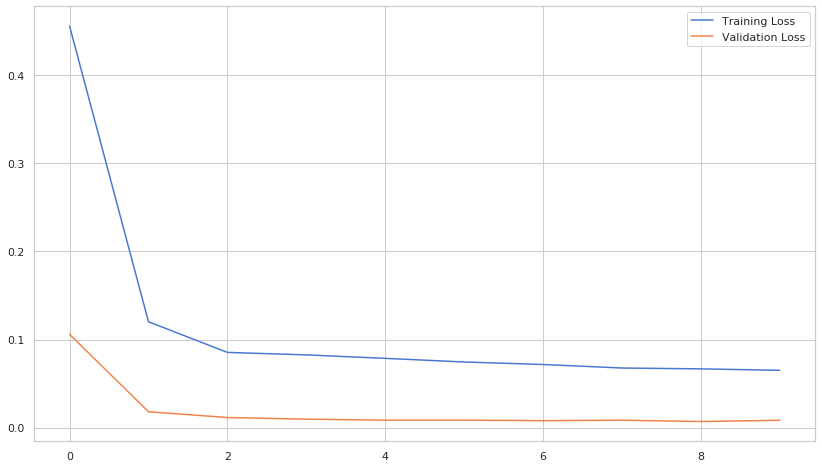

In [57]:
autoencoder.save('corrected_autoencoder.h5')
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label =  'Validation Loss')

plt.legend()

In [16]:
autoencoder = load_model('corrected_autoencoder.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [27]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 1)              0         
_________________________________________________________________
encoder1 (LSTM)              (None, 1, 16)             1152      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 16)             0         
_________________________________________________________________
encoder2 (LSTM)              (None, 4)                 336       
_________________________________________________________________
dropout_10 (Dropout)         (None, 4)                 0         
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
decoder1 (LSTM)              (None, 1, 4)              144 

In [28]:
%%time

X_train_pred1 = autoencoder.predict(X_train)



CPU times: user 27min 10s, sys: 2min 24s, total: 29min 35s
Wall time: 15min 37s


I do here the evaluation but it should be noted that we have continuous data.

In [29]:
autoencoder.evaluate(X_test, y_test)

2785321/2785321 [==============================] - 724s 260us/step


0.05699130717595065

Calculating the mean absolute error...

In [56]:
train_mae_loss = np.mean(np.abs(X_train_pred1 - X_train), axis=1)

Displaying kernel plot to decide over the threshold value. It seems that most of the normal data lies under 0.2 <br>
So, we can set the threshold to be 0.2 and then say that losses greater than this value will be taken as anomalies

(0, 1)

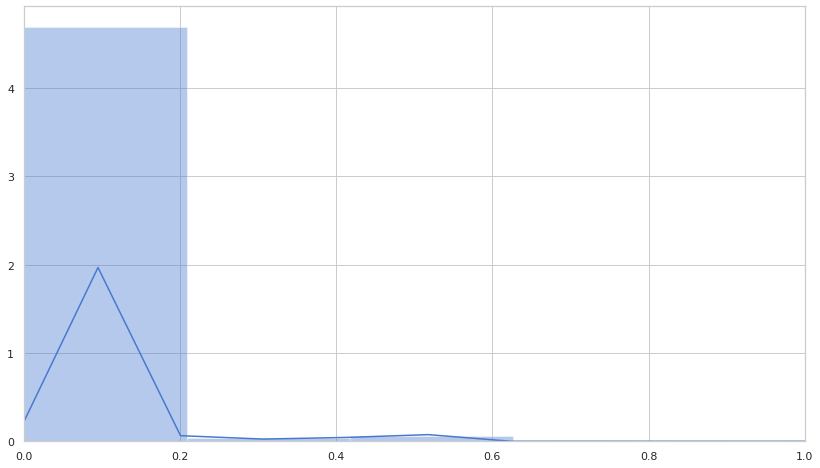

In [57]:
fig, ax = plt.subplots()

sns.distplot(train_mae_loss, bins=50, kde=True, ax = ax)

ax.set_xlim(0,1)


In [45]:
%%time

X_test_pred1 = autoencoder.predict(X_test)


CPU times: user 19min 30s, sys: 1min 43s, total: 21min 13s
Wall time: 11min 12s


In [46]:
# with open('prediction_objects.pkl', 'wb') as f: 
#     pickle.dump([X_train_pred1, X_test_pred1], f, protocol=-1)

In [17]:
with open('prediction_objects.pkl', 'rb') as f: 
    X_train_pred1, X_test_pred1 = pickle.load(f)   

In [18]:
threshold = 0.2


In [23]:
test_mae_loss = np.mean(np.abs(X_test_pred1 - X_test), axis=1)

In [24]:
test_score_df = pd.DataFrame(test)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold

test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold


In [298]:
# test_score_df = test_score_df.drop(['close'], axis=1)
test_score_df

,Time,Aggregate,target,loss,threshold,anomaly
3691,2013-09-18 06:20:16,3226.0,1.0,0.528209,0.2,True
3692,2013-09-18 06:20:24,3132.0,1.0,0.539512,0.2,True
3693,2013-09-18 06:20:32,3197.0,1.0,0.532275,0.2,True
3694,2013-09-18 06:20:40,3117.0,1.0,0.540822,0.2,True
3695,2013-09-18 06:20:48,3117.0,1.0,0.540822,0.2,True
...,...,...,...,...,...,...
6668077,2015-05-28 08:05:04,313.0,1.0,0.058924,0.2,False
6668078,2015-05-28 08:05:12,328.0,1.0,0.062734,0.2,False
6668079,2015-05-28 08:05:20,315.0,1.0,0.059438,0.2,False
6668080,2015-05-28 08:05:28,333.0,1.0,0.063981,0.2,False


In [75]:
type(X_test), type(X_test_pred1)

(numpy.ndarray, numpy.ndarray)

In [89]:
# from sklearn.metrics import mean_squared_error
# not_accuracy = mean_squared_error(np.reshape(X_test, (X_test.shape[0],  X_test.shape[2])), 
#                          np.reshape(X_test_pred1, (X_test_pred1.shape[0],  X_test_pred1.shape[2])))
# print('Accuracy: %f' % not_accuracy)

Accuracy: 0.056991


In [135]:
true_positive = len(test_score_df[(test_score_df.target == 1.0) & (test_score_df.anomaly == True)]) 
false_positive = len(test_score_df[(test_score_df.target == 1.0) & (test_score_df.anomaly == False)])

In [136]:
accuracy = true_positive / (false_positive + true_positive)
accuracy

0.10892496771467275

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



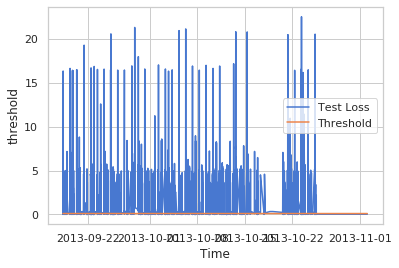

In [97]:
sns.lineplot(x=test[0:200000].Time, y=test_score_df[0:200000].loss,
                         label='Test Loss')

#change loss to threshold in y value
#name to threshold
sns.lineplot(x=test[0:200000].Time, y=test_score_df[0:200000].threshold,
                         label='Threshold')

# fig.update_layout(showlegend=True)
# fig.show()



In [198]:
test_score_df.Time =pd.to_datetime(test_score_df.Time)

In [254]:
test_score_df[:20000]

,Time,Aggregate,target,loss,threshold,anomaly
0,2013-09-18 06:20:16,3226.0,1.0,0.528209,0.2,True
1,2013-09-18 06:20:24,3132.0,1.0,0.539512,0.2,True
2,2013-09-18 06:20:32,3197.0,1.0,0.532275,0.2,True
3,2013-09-18 06:20:40,3117.0,1.0,0.540822,0.2,True
4,2013-09-18 06:20:48,3117.0,1.0,0.540822,0.2,True
...,...,...,...,...,...,...
19995,2013-09-24 20:14:40,259.0,1.0,0.044311,0.2,False
19996,2013-09-24 20:49:52,342.0,1.0,0.066198,0.2,False
19997,2013-09-24 20:50:00,3385.0,1.0,0.496294,0.2,True
19998,2013-09-24 20:50:08,3321.0,1.0,0.511141,0.2,True


In [217]:
# test_score_df.set_index('Time', inplace=True)
test_score_df.index = pd.to_datetime(test_score_df.index)

test_score_df.reset_index(inplace=True)

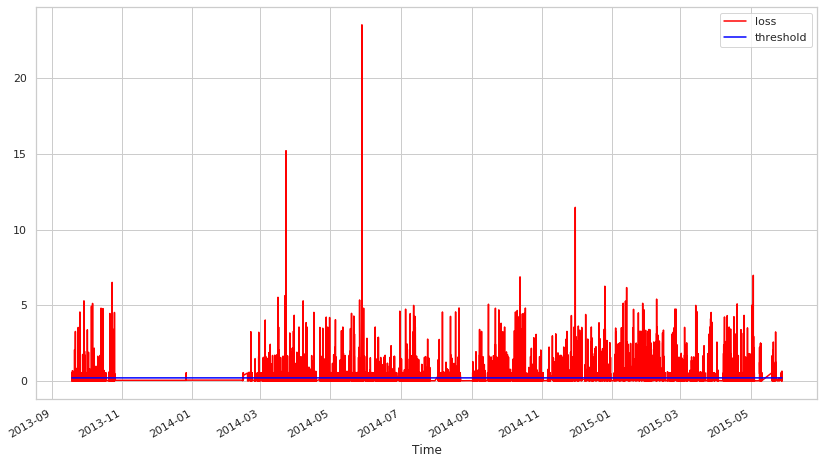

In [221]:
test_score_df.plot(x  = 'Time', y = ['loss', 'threshold'], color= [ 'red', 'blue'])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[:10000].Time, y=test_score_df[:10000].loss,
                        mode = 'lines', name='Test Loss'))

#change loss to threshold in y value
#name to threshold
fig.add_trace(go.Scatter(x=test.Time[:10000], y=test_score_df.threshold,
                        mode = 'lines', name='Threshold'))

fig.update_layout(showlegend=True)
fig.show()

In [345]:
# test_score_df.set_index('Time')['2013-09-18'].between_time('12:52' , '14:00')[:50]

,Aggregate,target,loss,threshold,anomaly
Time,,,,,
2013-09-18 12:52:00,194.0,1.0,0.024696,0.2,False
2013-09-18 12:52:08,196.0,1.0,0.025335,0.2,False
2013-09-18 12:52:16,253.0,1.0,0.042597,0.2,False
2013-09-18 12:52:24,253.0,1.0,0.042597,0.2,False
2013-09-18 12:52:32,253.0,1.0,0.042597,0.2,False
2013-09-18 12:52:40,253.0,1.0,0.042597,0.2,False
2013-09-18 12:52:48,253.0,1.0,0.042597,0.2,False
2013-09-18 12:52:56,254.0,1.0,0.042884,0.2,False
2013-09-18 12:53:04,258.0,1.0,0.044027,0.2,False


In [382]:
test_score_df[0:10000][test_score_df[0:10000].anomaly == True][['Time', 'Aggregate']].set_index('Time')['2013-09-18'].between_time('13:56', '14:00')


,Aggregate
Time,


In [26]:
anomaliezz = test_score_df[test_score_df.anomaly == True]

In [29]:
anomaliezz

,Time,Aggregate,target,loss,threshold,anomaly
3691,2013-09-18 06:20:16,4.827422,1.0,0.528209,0.2,True
3692,2013-09-18 06:20:24,4.674618,1.0,0.539512,0.2,True
3693,2013-09-18 06:20:32,4.780281,1.0,0.532275,0.2,True
3694,2013-09-18 06:20:40,4.650234,1.0,0.540822,0.2,True
3695,2013-09-18 06:20:48,4.650234,1.0,0.540822,0.2,True
...,...,...,...,...,...,...
6668021,2015-05-28 07:57:36,15.583859,1.0,0.450324,0.2,True
6668022,2015-05-28 07:57:44,15.463567,1.0,0.570039,0.2,True
6668024,2015-05-28 07:58:00,15.500955,1.0,0.532832,0.2,True
6668025,2015-05-28 07:58:08,15.556225,1.0,0.477829,0.2,True


In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.Time[:10000], y=scaler.inverse_transform(test.Aggregate[:50000]),                                                                            
                        mode = 'lines', name='Aggregate Power Consumption'))

#change loss to threshold in y value
#name to threshold
fig.add_trace(go.Scatter(x=anomaliezz[:10000].Time, y= scaler.inverse_transform(anomaliezz[:10000]['Aggregate']),
                        mode = 'markers', name='Anomaly'))



fig.update_layout(showlegend=True)
fig.show()

import plotly.express as px

fig.write_html("anomaly_50K_datapoint.html")


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[:10000].Time, y=scaler.inverse_transform(test[0:10000].Aggregate),                                                                            
                        mode = 'lines', name='Aggregate Power Consumption'))

#change loss to threshold in y value
#name to threshold
fig.add_trace(go.Scatter(x=test_score_df[0:10000].Time, y= test_score_df[0:10000][test_score_df[0:10000].anomaly == True]['Aggregate'],
                        mode = 'markers', name='Anomaly'))



fig.update_layout(showlegend=True)
fig.show()